In [41]:
# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
data = pd.read_csv("../data/card_transactions.csv")

In [3]:
data.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [5]:
for col in data.columns:
    print(col)
    print(data[col].isna().sum())

customer_id
0
balance_account
0
purchases_amount
0
paid_advance
0
full_purchases
0
balance_frequency_update
0
installments
0
purchases_frequency
0
full_purchases_frequency
0
purchases_installments_frequency
0
cash_advance_frequency
0
nr_cash_advances
0
nr_purchases
0
credit_limit
1
fixed_rate_period
0
payments
0
min_payments
298
full_payment_prc
0


In [6]:
data = data.dropna()

In [47]:
data = data.drop_duplicates()

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8201 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8201 non-null   object 
 1   balance_account                   8201 non-null   float64
 2   purchases_amount                  8201 non-null   float64
 3   paid_advance                      8201 non-null   float64
 4   full_purchases                    8201 non-null   float64
 5   balance_frequency_update          8201 non-null   float64
 6   installments                      8201 non-null   float64
 7   purchases_frequency               8201 non-null   float64
 8   full_purchases_frequency          8201 non-null   float64
 9   purchases_installments_frequency  8201 non-null   float64
 10  cash_advance_frequency            8201 non-null   float64
 11  nr_cash_advances                  8201 non-null   int64  
 12  nr_pur

In [48]:
for col in data.columns:
    print(col)
    print(data[col].value_counts())

customer_id
tGEg8fT2eCgVxdwS    1
6s9R9V7sZSKAdjWj    1
DYKcG8qtwA4E9A4X    1
M0oSySZ3de55P79D    1
Dm8iVgWksqUXYkAA    1
                   ..
Lpbv6zZLHaMOB9K5    1
HfR5cAJsU2GcigFc    1
kYMt0dXH1ekFTzwW    1
ZOtoomh7H7IBGhJc    1
QIwf3M4Yn4EHwAyv    1
Name: customer_id, Length: 8201, dtype: int64
balance_account
0.000000       6
9.298409       1
204.614380     1
111.789941     1
2919.796228    1
              ..
626.342256     1
2499.228939    1
3462.475340    1
3044.269636    1
1861.087370    1
Name: balance_account, Length: 8196, dtype: int64
purchases_amount
0.00       1867
45.65        24
150.00       15
60.00        13
200.00       12
           ... 
1263.51       1
2138.34       1
2476.30       1
1835.93       1
1752.06       1
Name: purchases_amount, Length: 5718, dtype: int64
paid_advance
0.000000       4215
400.571728        1
1697.660901       1
1116.128466       1
520.844673        1
               ... 
357.184643        1
3124.247282       1
8253.390661       1
4308.33962

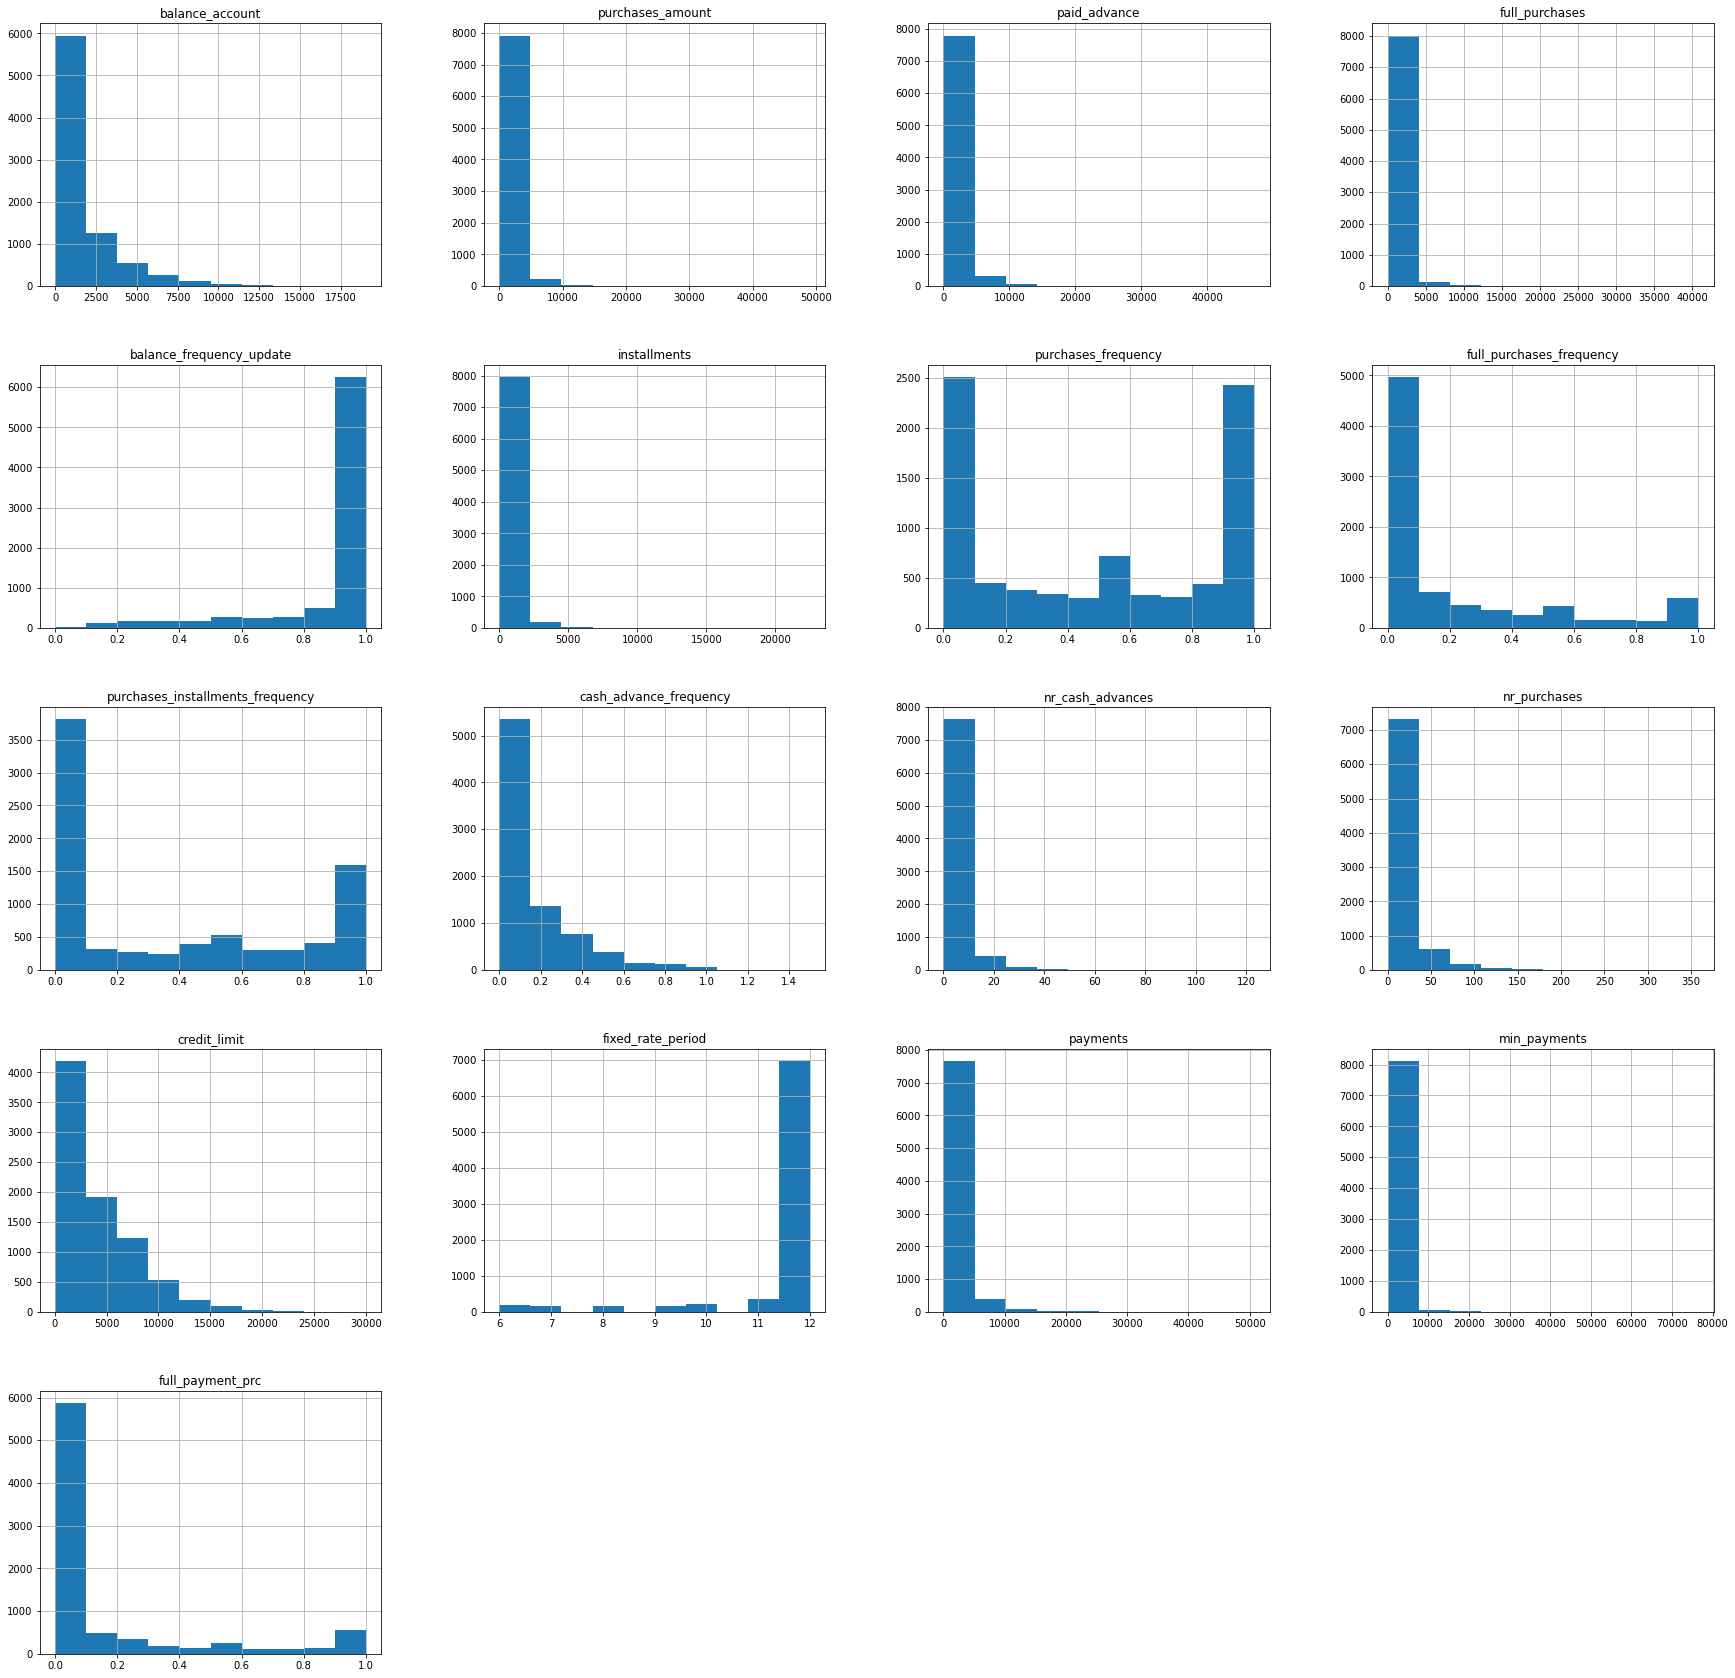

In [17]:
data.hist(figsize=(30,30))
plt.show();

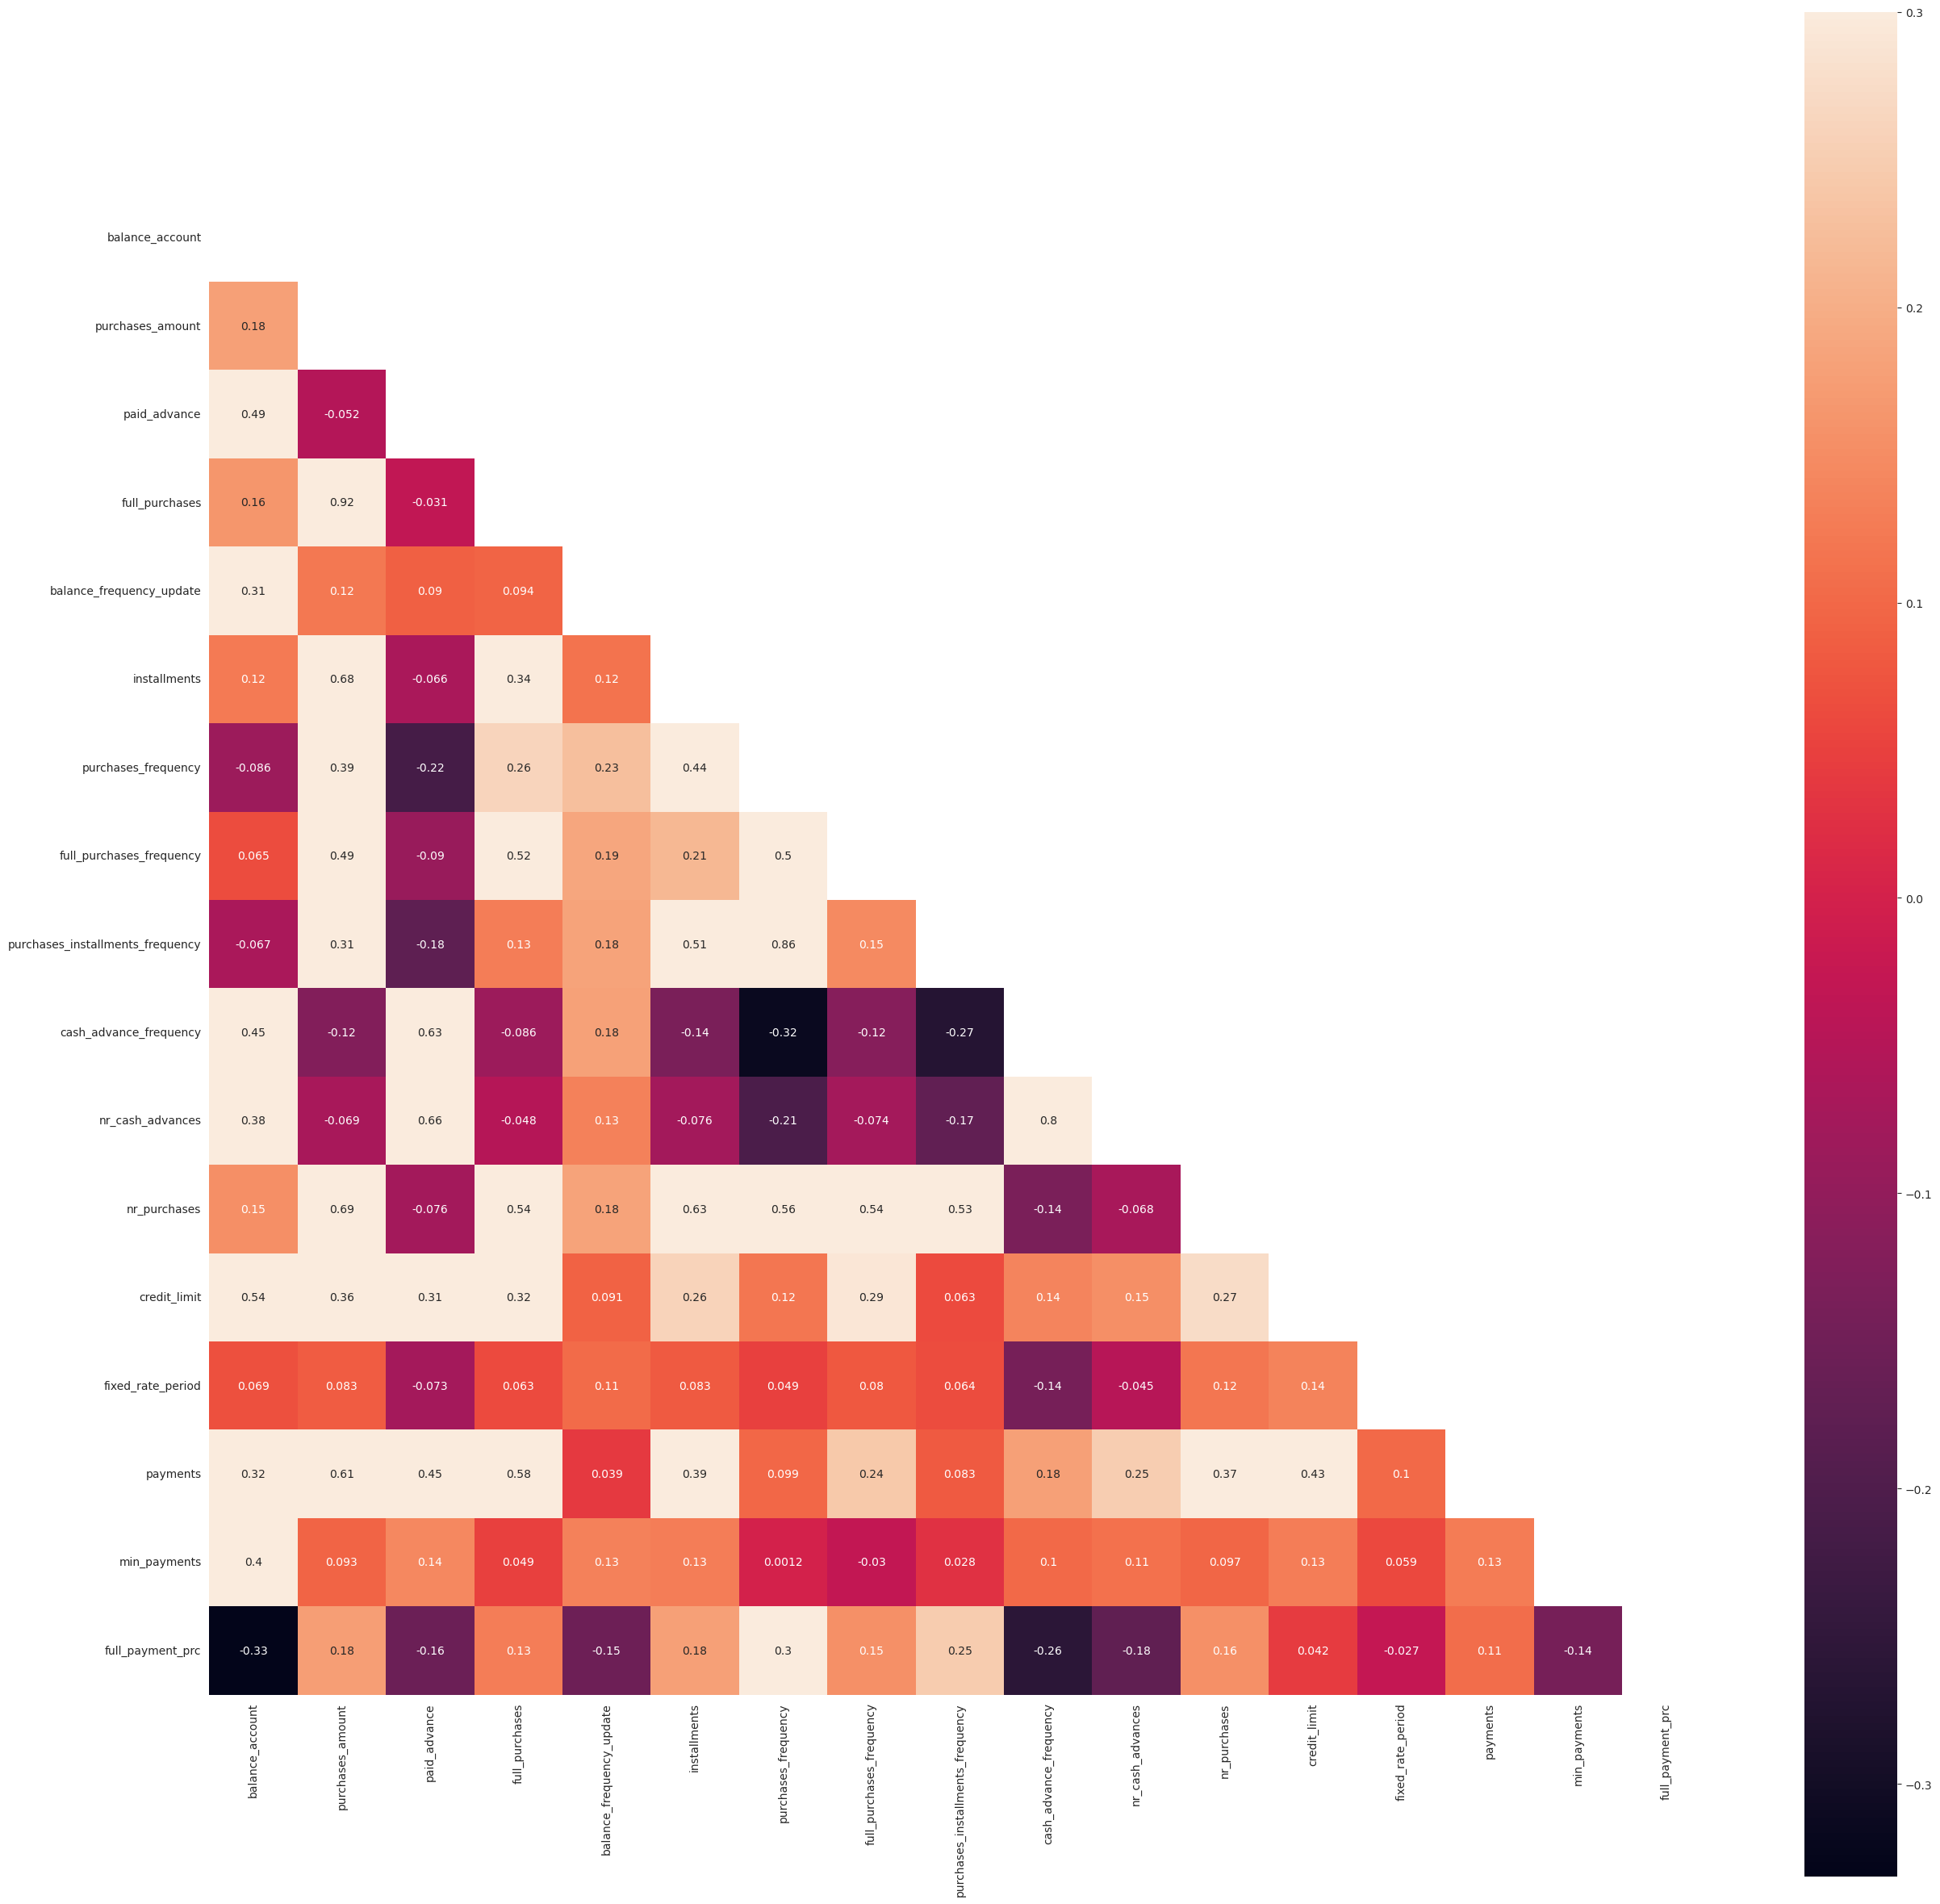

In [64]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 30))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

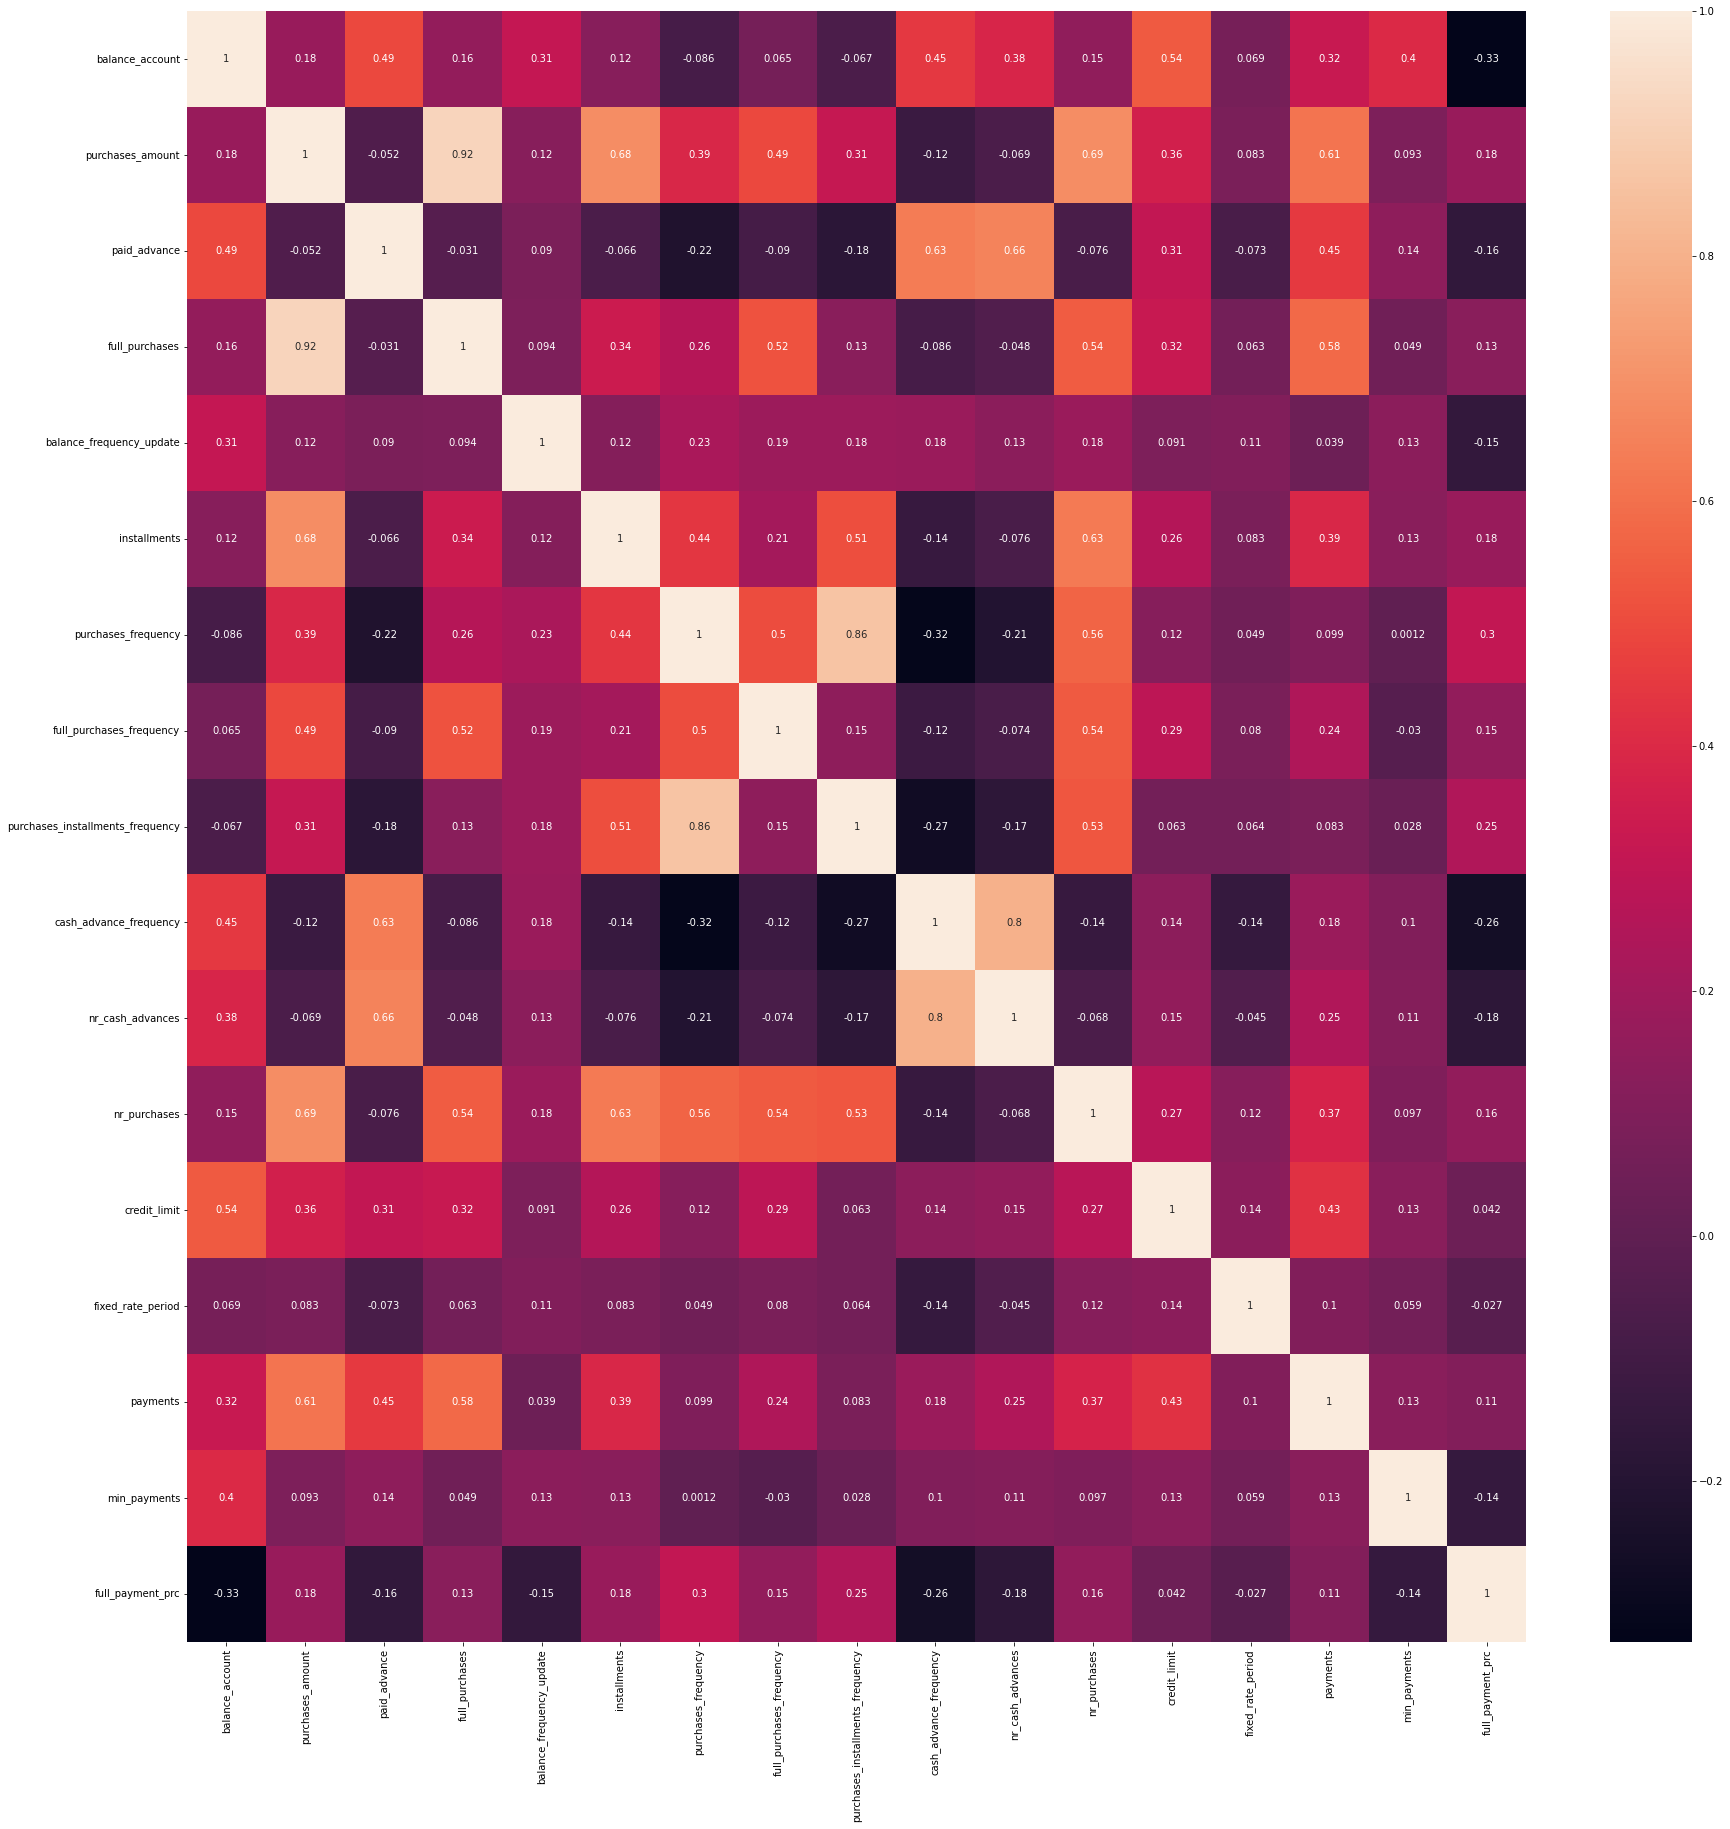

In [19]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,)
plt.show()

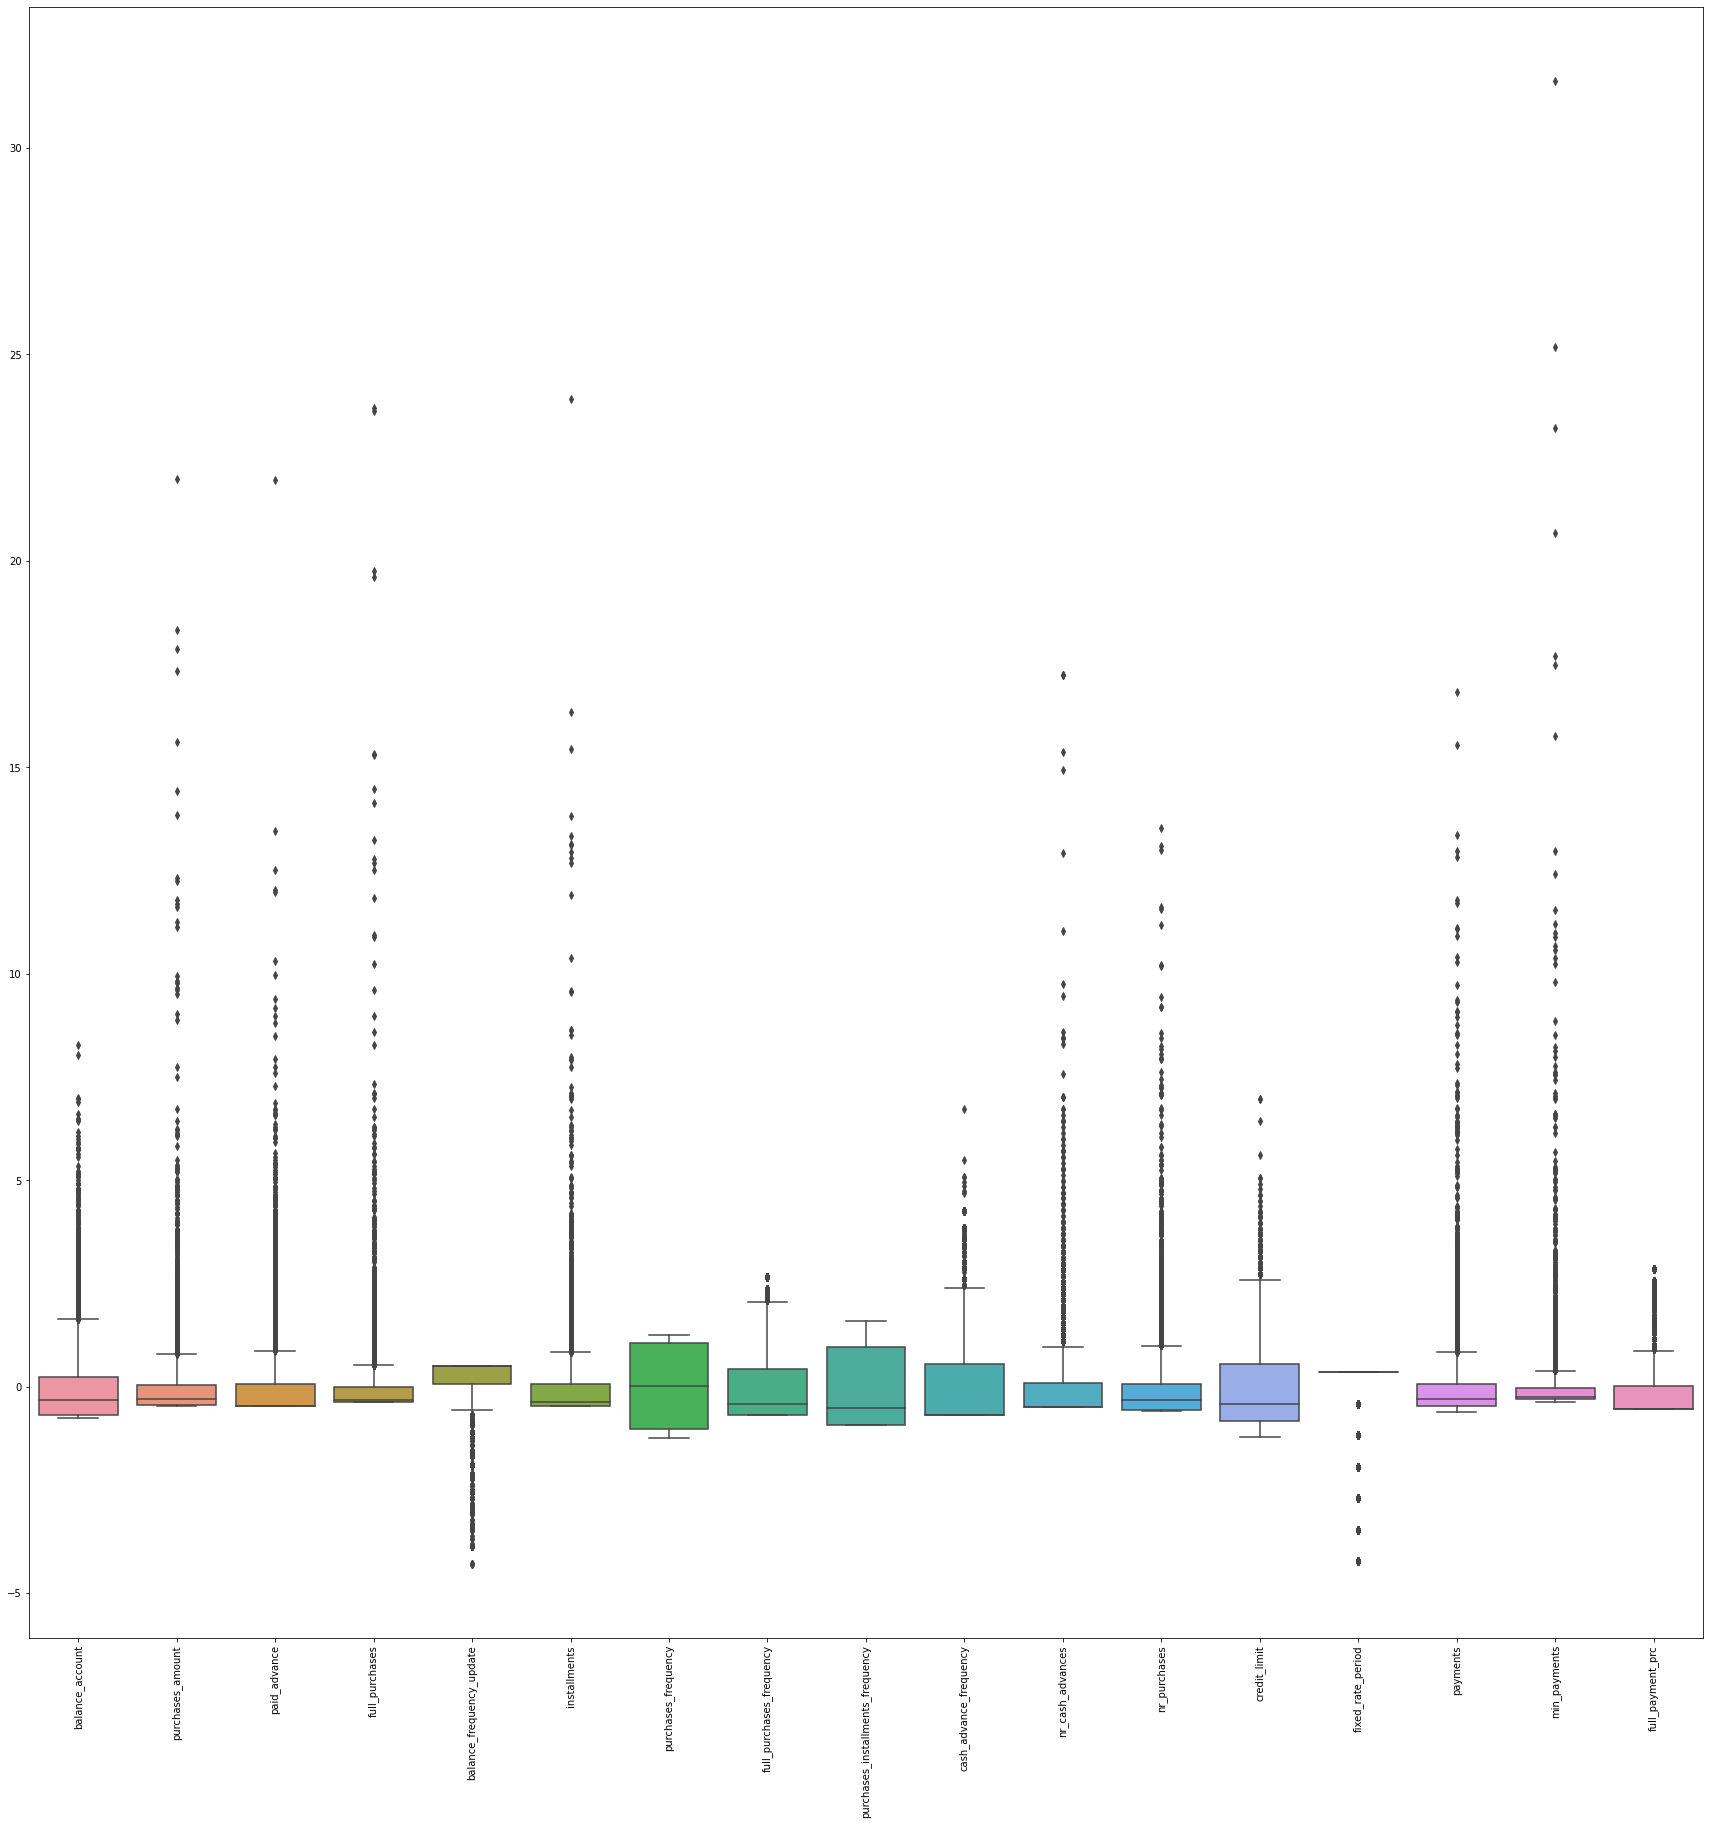

In [27]:
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop(columns=['customer_id'])), columns=data.drop(columns=['customer_id']).columns)
plt.figure(figsize=(30,30))
ax = sns.boxplot(data=data_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
# NOT SCALED DATA

In [30]:
r_seed = 23 

In [33]:
cluster_errors = []
data_no_id = data.drop(columns=['customer_id'])
for i in range(1, 30):
    n_clusters = i
    kmeans_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0, 
                       # n_jobs=1
                      ),
            ),
        ]
    )
    kmeans_pipeline.fit(data_no_id)
    kmeans_pipeline.predict(data_no_id)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)

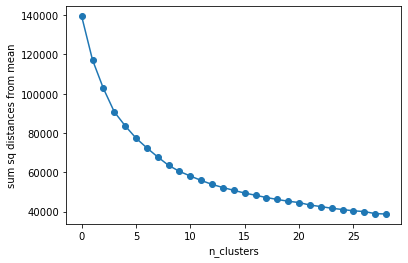

In [34]:
# elbow
plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

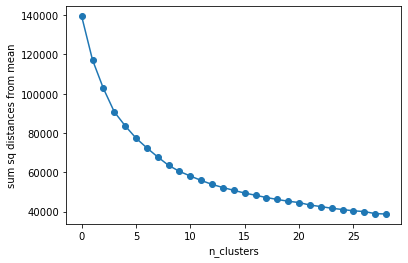

In [34]:
# elbow
plt.clf()
plt.plot(cluster_errors, "o-")
plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

In [33]:
cluster_errors = []
data_no_id = data.drop(columns=['customer_id'])
for i in range(1, 30):
    n_clusters = i
    kmeans_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0, 
                       # n_jobs=1
                      ),
            ),
        ]
    )
    kmeans_pipeline.fit(data_no_id)
    kmeans_pipeline.predict(data_no_id)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)

In [35]:
# trying something from the day 7 solutions

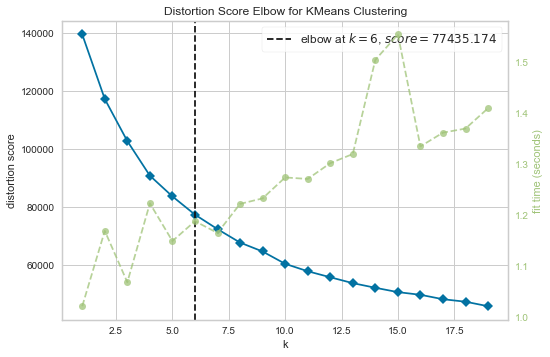

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# More fancy and viasually way to do the elbow method approach:

# Libraries and modules Installation:
# pip install yellowbrick

# Libraries:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# List with Features:
features = list(data_no_id.columns)

# Setting up the content of variable 'X':
X = data_no_id.loc[:,features].values

numeric_transformer = Pipeline(steps=[('onehot', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])
numeric_features = list(range(len(features)))

feature_encoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

X = feature_encoder.fit_transform(X)

# Clustering model and visualizer:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(X) # Fit the data to the visualizer
visualizer.poof() # Draw/show/poof the data

For n_clusters = 2 The average silhouette_score is : 0.07052935
For n_clusters = 3 The average silhouette_score is : 0.33853662
For n_clusters = 4 The average silhouette_score is : 0.05444082
For n_clusters = 5 The average silhouette_score is : 0.001340358
For n_clusters = 6 The average silhouette_score is : 0.0045350567




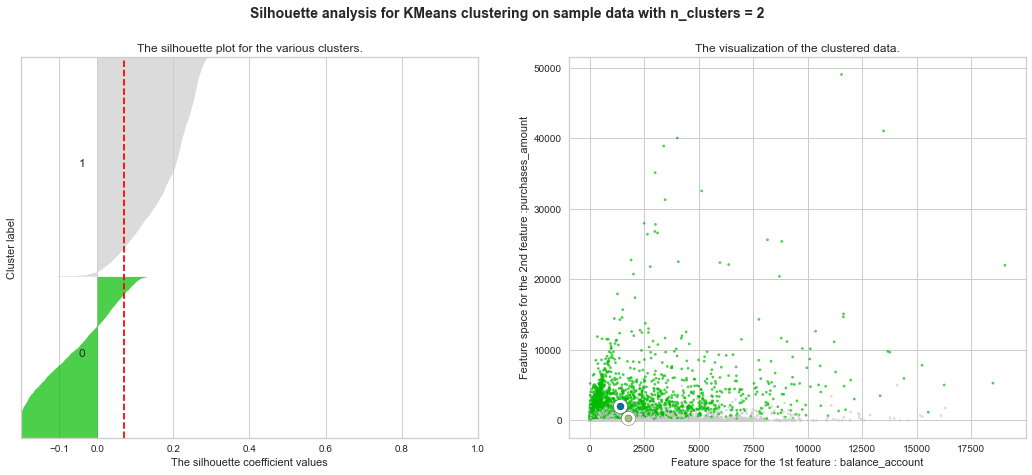

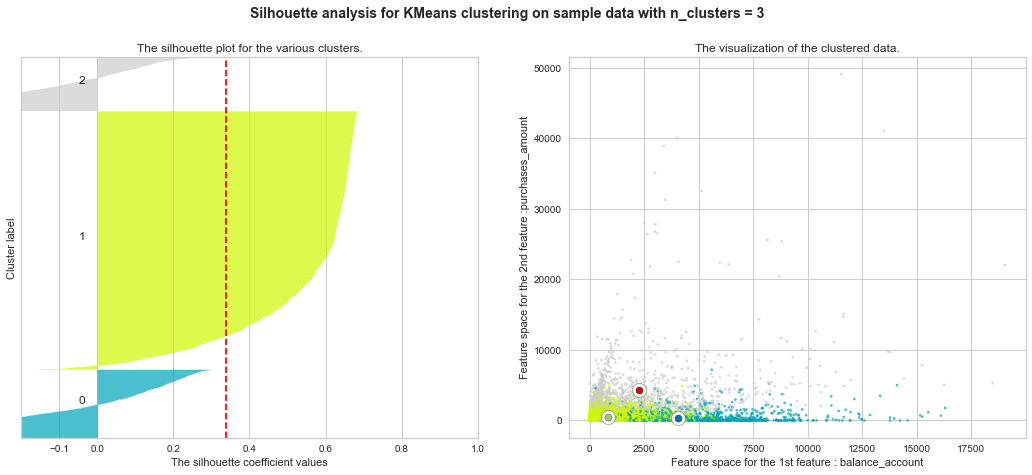

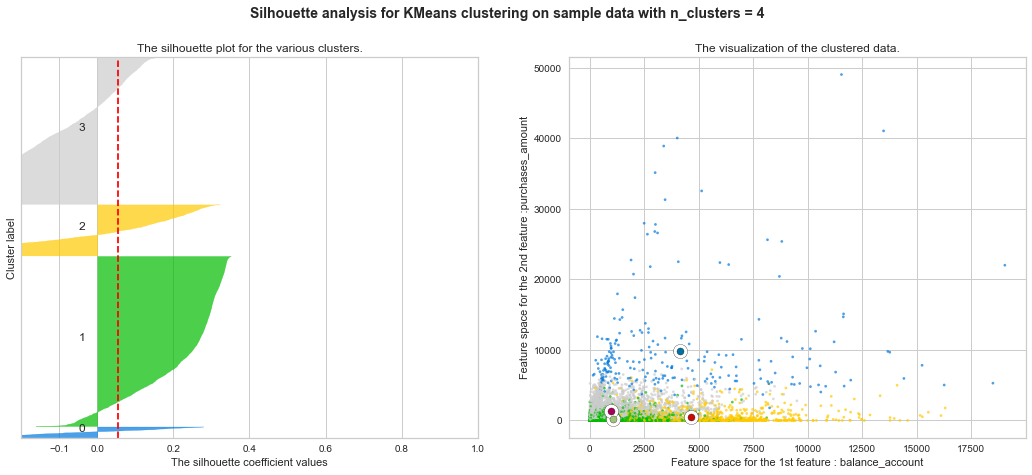

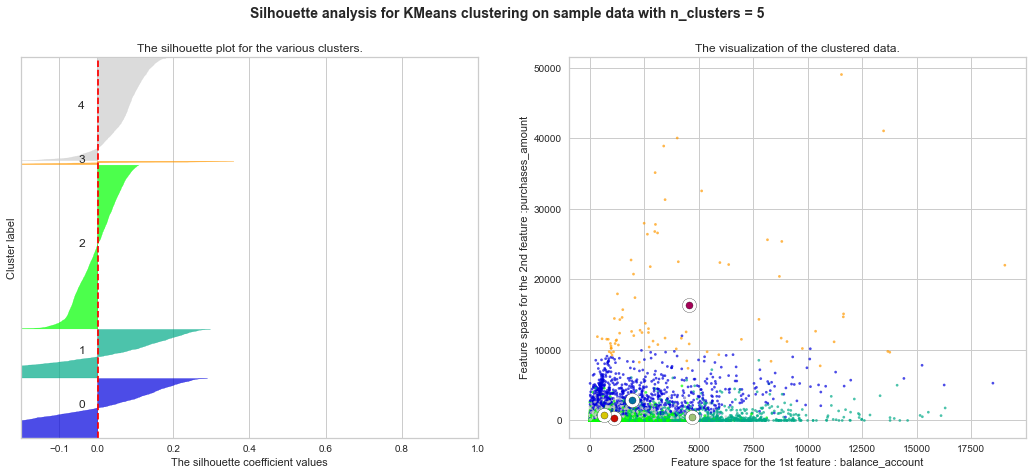

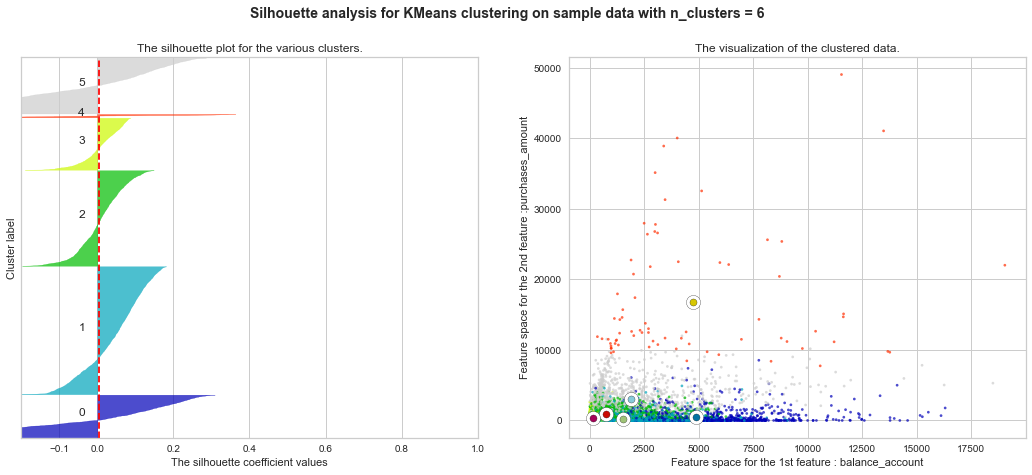

In [42]:
range_n_clusters = range(2, 7)
X = data_no_id.copy()
X = X.values.astype("float32")
cols = data_no_id.columns

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0),
            ),
        ]
    )
    cluster_labels = kmeans_pipeline.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k",
    )

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[0])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[1])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()

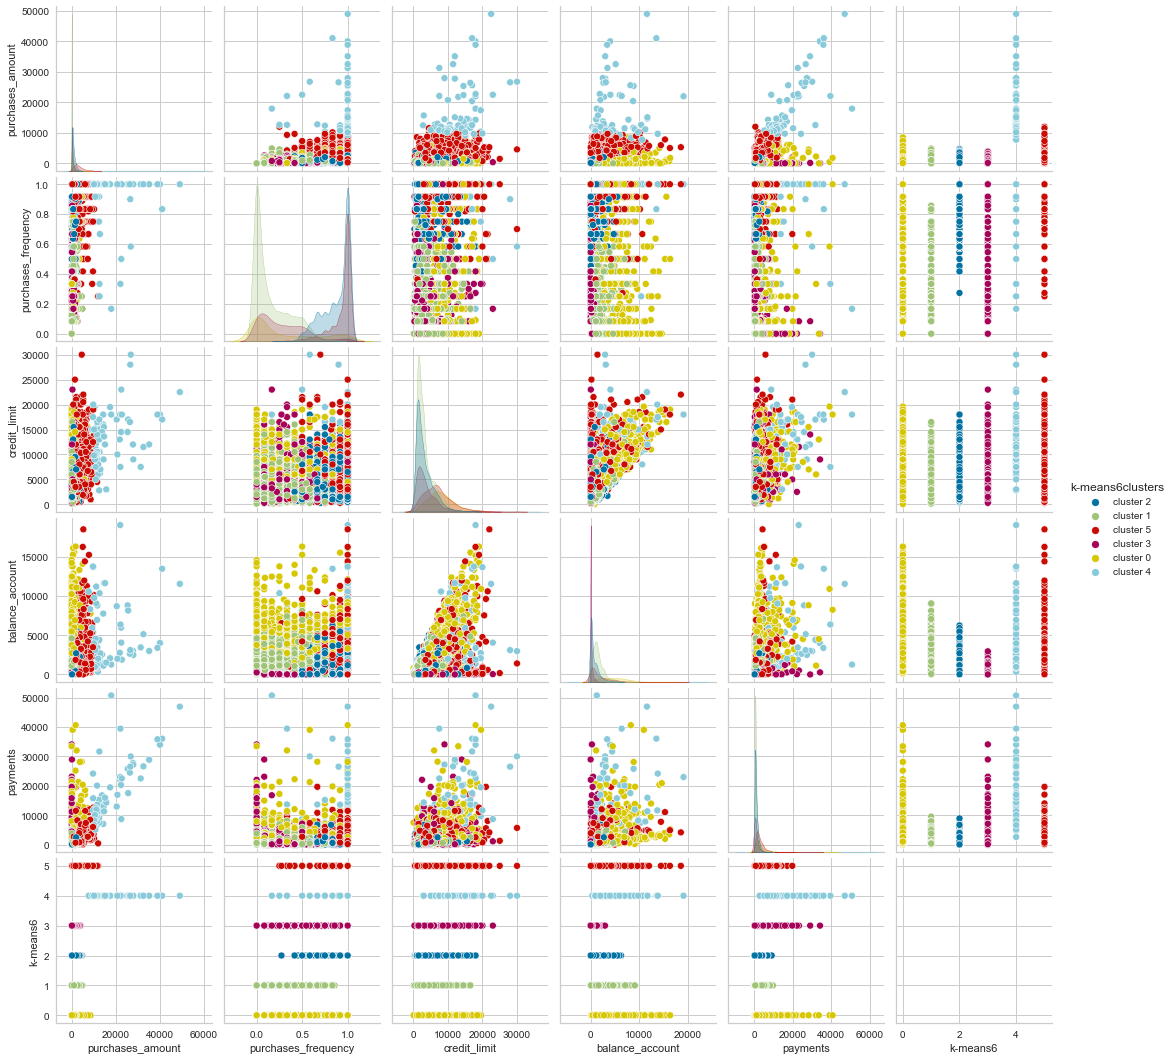

In [46]:
n_clusters = 6
kmeans_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0)),
    ]
)
kmeans_pipeline.fit(data_no_id)
labels = kmeans_pipeline.predict(data_no_id)
centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_

cols = ["purchases_amount", "purchases_frequency", "credit_limit", "balance_account", "payments"]
kmeans_pipeline.fit(data[cols])
data_kmeans = data[cols].copy()
#data_kmeans = data_no_id.copy()
data_kmeans["k-means6"] = labels
data_kmeans["k-means6clusters"] = data_kmeans["k-means6"].map(
    lambda i: "cluster " + str(i)
)

#cols = ["ball_control", "interceptions", "strength", "k-means4clusters"]
g1 = sns.pairplot(data_kmeans, hue="k-means6clusters")
g1.fig.figsize = (30, 30)

In [55]:
data_copy.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,k-means6_hm
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,50
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,50
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,25
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,125
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,75


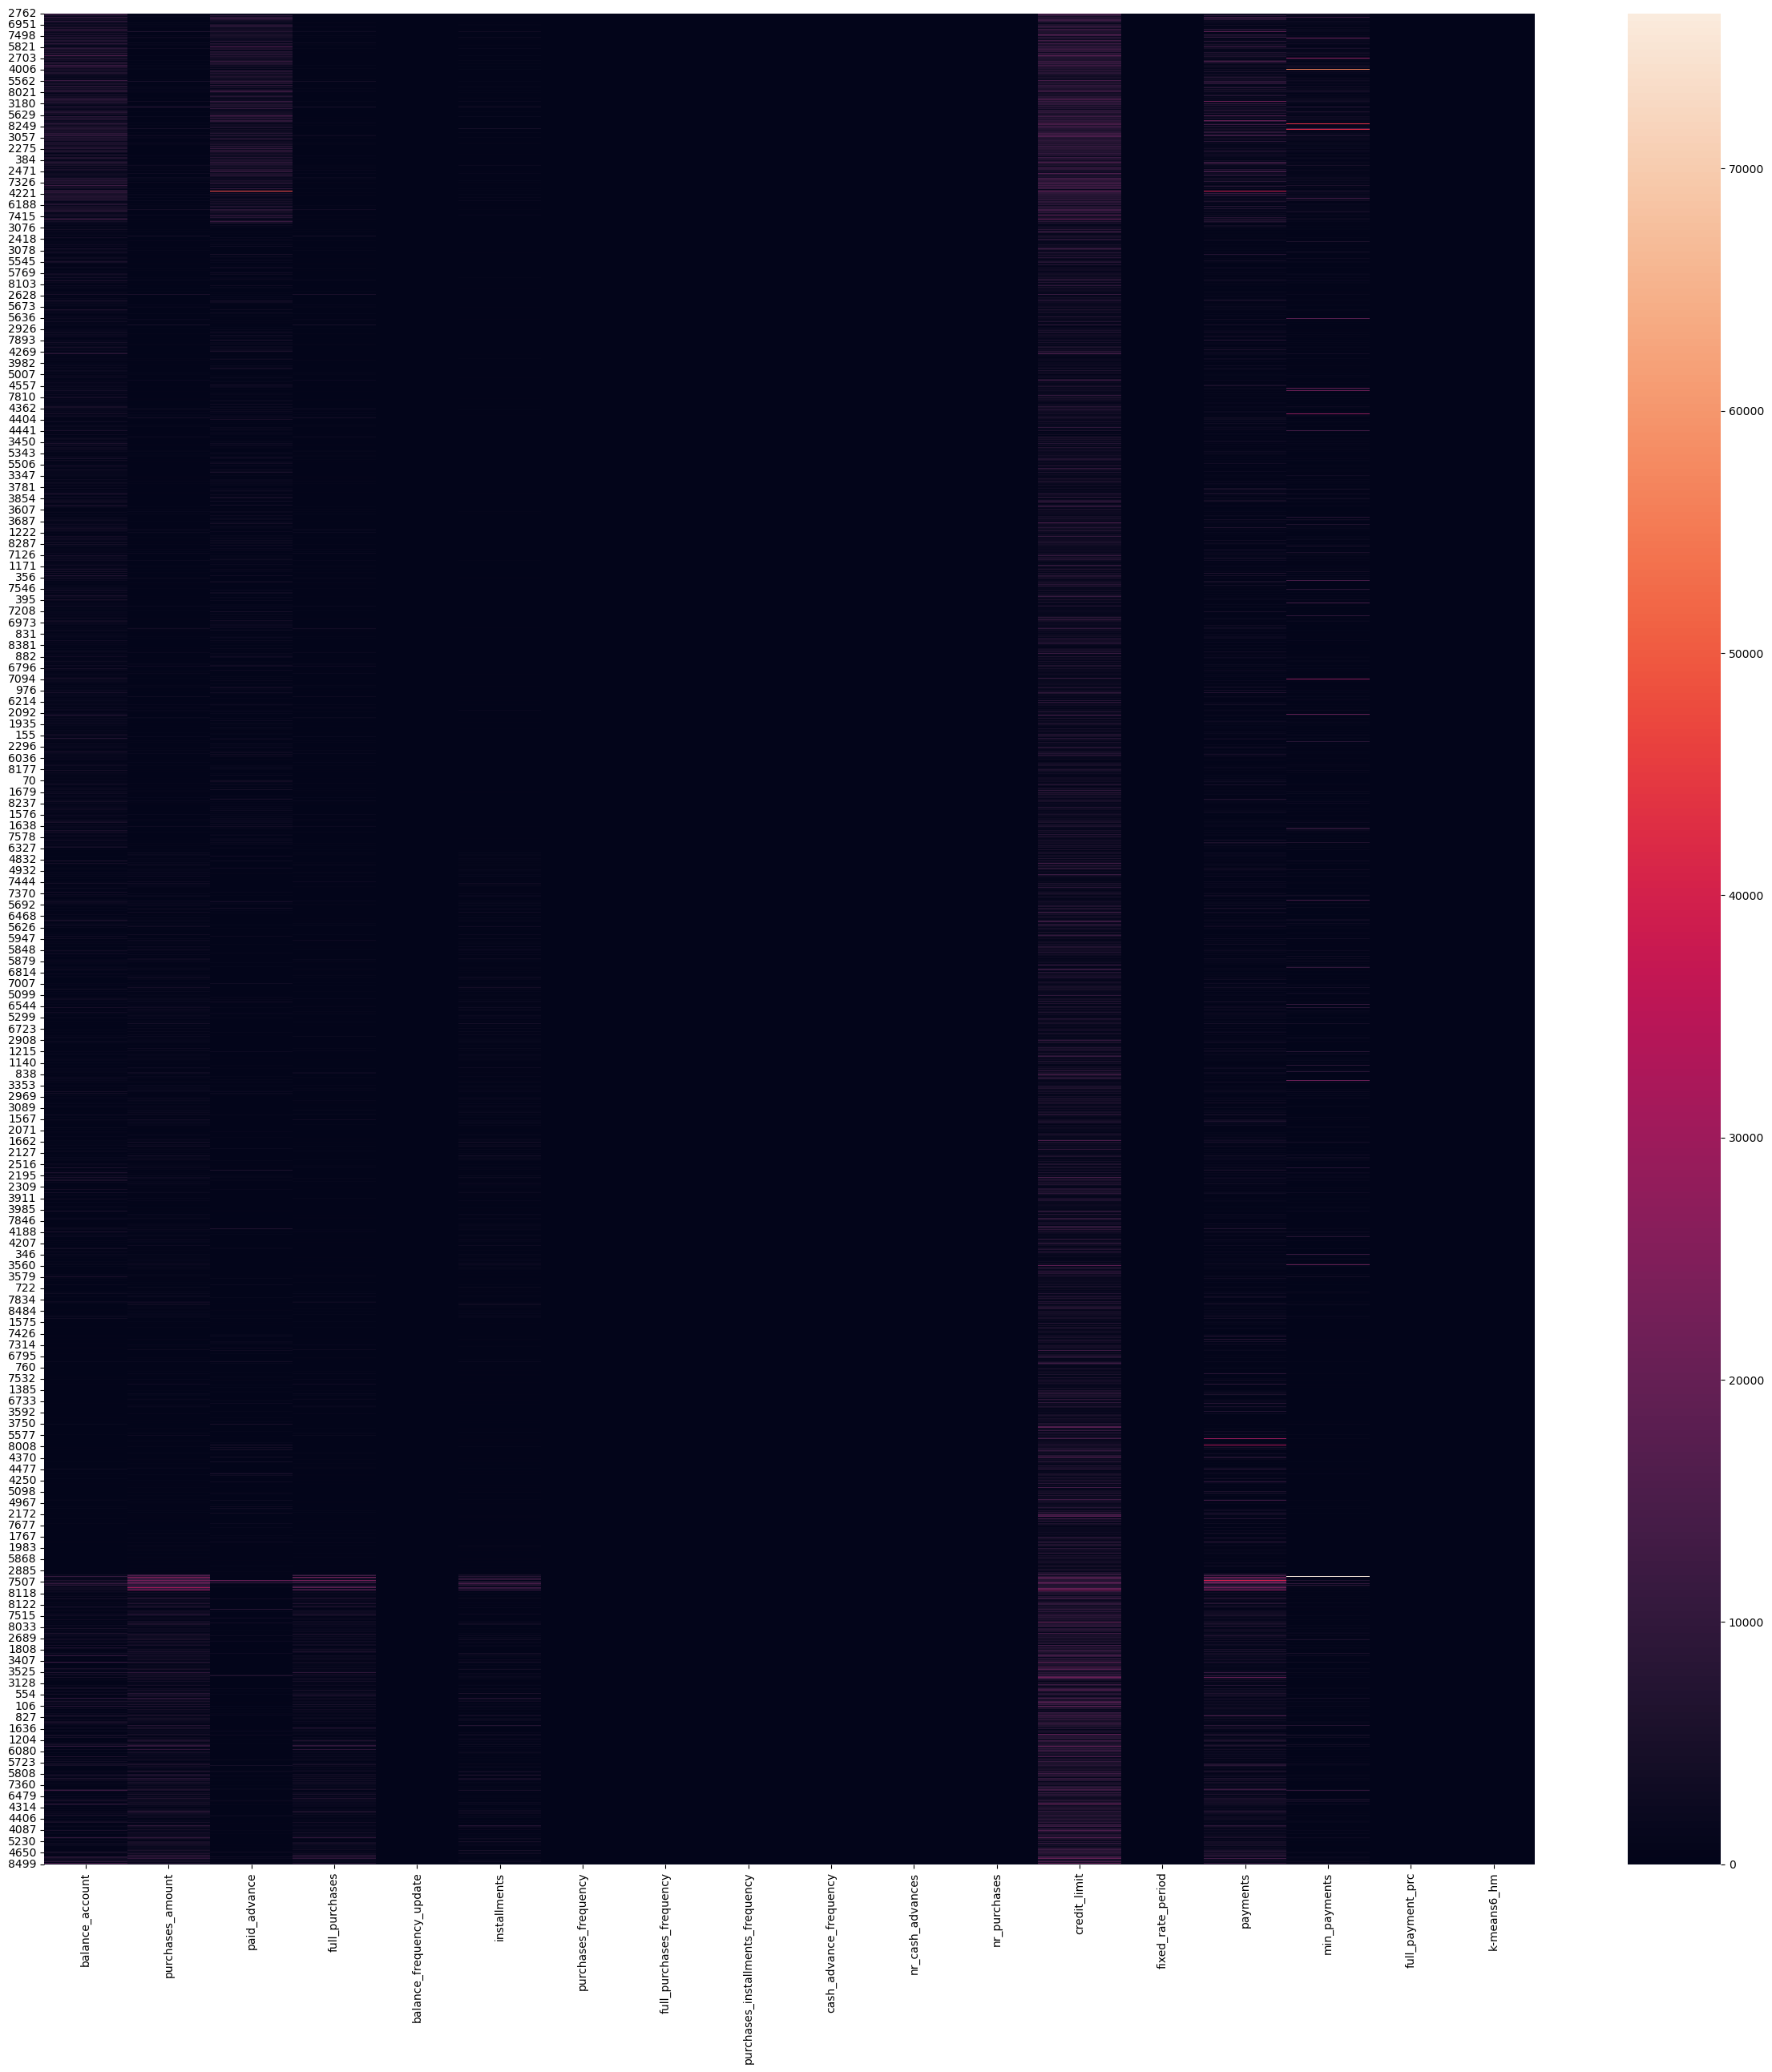

In [62]:
data["customer_id"] = data["customer_id"].astype(str)
plt.style.use('default')
data_copy = data.copy()
data_copy["k-means6"] = data_kmeans["k-means6"]
data_copy["k-means6_hm"] = data_kmeans["k-means6"] * 25
plt.figure(figsize=(30,30))
sns.heatmap(data_copy.sort_values(by="k-means6").drop(columns=["customer_id","k-means6"]));